# **Heart Disease Prediction: Detecting Left Bundle Branch Block (LBBB) Using Signal Processing and AI** 
<img src="Pics/Intro.png"/>

##### This project aims to develop a predictive framework for detecting Left Bundle Branch Block (LBBB), a key cardiac abnormality linked to heart disease. Using signal-processing techniques, we preprocess cardiac signals, extract critical features, and apply machine learning models for accurate classification. This notebook outlines the entire process, from data preparation to model evaluation.
-----

## Section 1: Reading and Understanding the Data

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import skew, kurtosis,entropy
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle

### Reading the Data

In [2]:
train_normal = pd.read_csv("Normal&LBBB/Normal_Train.txt", delimiter = '|', header=None)
train_lbbb = pd.read_csv("Normal&LBBB/LBBB_Train.txt", delimiter = '|', header=None)
test_normal = pd.read_csv("Normal&LBBB/Normal_Test.txt", delimiter = '|', header=None)
test_lbbb = pd.read_csv("Normal&LBBB/LBBB_Test.txt", delimiter = '|', header=None)

In [3]:
print(train_normal.shape)
print(train_lbbb.shape)
print(test_normal.shape)
print(test_lbbb.shape)

(200, 301)
(399, 301)
(200, 301)
(394, 301)


In [4]:
train_normal.head(5)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,-0.050778,-0.050778,-0.040778,-0.035778,-0.045778,-0.055778,-0.065778,-0.045778,-0.050778,-0.040778,...,0.029222,0.019222,0.004222,-0.005778,0.004222,0.014222,0.014222,0.019222,0.019222,NaN
1,0.019222,0.014222,0.009222,-0.000778,0.004222,0.019222,0.019222,0.009222,0.014222,0.009222,...,-0.060778,-0.065778,-0.055778,-0.060778,-0.060778,-0.060778,-0.065778,-0.060778,-0.060778,NaN
2,-0.070778,-0.080778,-0.080778,-0.060778,-0.055778,-0.075778,-0.100780,-0.095778,-0.075778,-0.060778,...,-0.105780,-0.115780,-0.130780,-0.125780,-0.115780,-0.115780,-0.125780,-0.135780,-0.120780,NaN
3,-0.130780,-0.120780,-0.100780,-0.125780,-0.135780,-0.145780,-0.135780,-0.125780,-0.115780,-0.120780,...,-0.030778,-0.035778,-0.035778,-0.035778,-0.035778,-0.025778,-0.035778,-0.035778,-0.045778,NaN
4,-0.030778,-0.025778,-0.040778,-0.045778,-0.040778,-0.040778,-0.025778,-0.015778,-0.035778,-0.035778,...,-0.165780,-0.165780,-0.160780,-0.160780,-0.175780,-0.185780,-0.175780,-0.180780,-0.165780,NaN


In [5]:
train_lbbb.head(5)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,-0.009065,0.005935,0.005935,0.000935,-0.019065,-0.024065,-0.009065,-0.019065,-0.004065,0.000935,...,0.745930,0.730930,0.720930,0.730930,0.740930,0.735930,0.725930,0.715930,0.705930,NaN
1,0.000935,0.010935,0.010935,0.005935,0.000935,0.000935,0.015935,0.010935,0.010935,0.010935,...,0.510930,0.500930,0.490930,0.495930,0.485930,0.460930,0.460930,0.440930,0.445930,NaN
2,-0.259070,-0.264070,-0.274070,-0.284070,-0.269070,-0.264070,-0.244070,-0.234070,-0.214070,-0.224070,...,-0.074065,-0.084065,-0.069065,-0.059065,-0.069065,-0.089065,-0.104070,-0.109070,-0.114070,NaN
3,-0.074065,-0.084065,-0.069065,-0.059065,-0.069065,-0.089065,-0.104070,-0.109070,-0.114070,-0.109070,...,-0.459070,-0.454070,-0.479070,-0.489070,-0.484070,-0.489070,-0.474070,-0.489070,-0.504070,NaN
4,-0.574070,-0.589070,-0.604070,-0.589070,-0.579070,-0.584070,-0.574070,-0.589070,-0.584070,-0.589070,...,0.000935,0.035935,0.045935,0.065935,0.055935,0.035935,0.030935,0.060935,0.085935,NaN


In [6]:
test_normal.head(5)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,-0.013701,-0.023701,-0.018701,-0.008701,-0.003701,0.001299,0.001299,-0.003701,0.006299,0.001299,...,-0.023701,-0.023701,-0.028701,-0.038701,-0.043701,-0.043701,-0.033701,-0.023701,-0.038701,NaN
1,-0.023701,-0.028701,-0.038701,-0.043701,-0.043701,-0.033701,-0.023701,-0.038701,-0.038701,-0.048701,...,-0.078701,-0.048701,-0.053701,-0.048701,-0.053701,-0.053701,-0.063701,-0.053701,-0.038701,NaN
2,-0.048701,-0.058701,-0.053701,-0.048701,-0.048701,-0.048701,-0.068701,-0.078701,-0.048701,-0.053701,...,-0.038701,-0.038701,-0.043701,-0.048701,-0.038701,-0.023701,-0.023701,-0.028701,-0.028701,NaN
3,-0.033701,-0.038701,-0.038701,-0.073701,-0.053701,-0.053701,-0.038701,-0.038701,-0.043701,-0.048701,...,-0.033701,-0.033701,-0.018701,-0.018701,-0.018701,-0.038701,-0.043701,-0.033701,-0.023701,NaN
4,-0.023701,-0.028701,-0.028701,-0.023701,-0.023701,-0.023701,-0.033701,-0.033701,-0.033701,-0.018701,...,-0.003701,-0.013701,-0.023701,-0.023701,-0.028701,-0.023701,-0.023701,-0.013701,-0.013701,NaN


In [7]:
test_lbbb.head(5)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,0.045325,0.015325,-0.004675,-0.009675,0.030325,0.070325,0.085325,0.055325,0.035325,0.030325,...,-0.30967,-0.34467,-0.35967,-0.38967,-0.42467,-0.43467,-0.44967,-0.41467,-0.36967,NaN
1,-0.079675,-0.064675,-0.069675,-0.059675,-0.079675,-0.104670,-0.134670,-0.144670,-0.169670,-0.169670,...,-0.68467,-0.65967,-0.61967,-0.60967,-0.62467,-0.64967,-0.66467,-0.66967,-0.63467,NaN
2,-0.409670,-0.429670,-0.409670,-0.374670,-0.364670,-0.344670,-0.349670,-0.384670,-0.399670,-0.394670,...,-0.60967,-0.60467,-0.60467,-0.59967,-0.59467,-0.58467,-0.58467,-0.58467,-0.59967,NaN
3,-0.349670,-0.339670,-0.319670,-0.314670,-0.319670,-0.334670,-0.339670,-0.324670,-0.309670,-0.324670,...,-0.42967,-0.44967,-0.45467,-0.44967,-0.43467,-0.42967,-0.44967,-0.46467,-0.45467,NaN
4,-0.144670,-0.129670,-0.129670,-0.129670,-0.149670,-0.149670,-0.144670,-0.149670,-0.134670,-0.164670,...,-0.36467,-0.36467,-0.36967,-0.36967,-0.36467,-0.34967,-0.34467,-0.34967,-0.35467,NaN


It seems that the file contains an extra delimiter '|' with nothing after it which caused the last column in every table to be NaN so we consider droping the last column in every table.

In [8]:
train_normal = train_normal.iloc[:, :-1]
train_lbbb = train_lbbb.iloc[:, :-1]
test_normal = test_normal.iloc[:, :-1]
test_lbbb = test_lbbb.iloc[:, :-1]

### Visualizing our Signals

In [9]:
def plot_ecg_signal(data):
    """
    Plot ECG signal from a DataFrame where columns are sample indices
    and the single row contains the signal amplitudes.
    
    Parameters:
    data (pandas.DataFrame): DataFrame containing ECG samples
    """
    # Convert the single row to a format suitable for seaborn
    # Reset the index to get sample numbers as x-axis values
    signal_df = pd.DataFrame({
        'Sample': range(len(data.columns)),
        'Amplitude': data.iloc[0].values
    })
    
    # Create the plot
    plt.figure(figsize=(15, 5))
    sns.set_style("whitegrid")
    
    # Plot the signal
    sns.lineplot(data=signal_df, x='Sample', y='Amplitude', linewidth=1, color='red')
    
    # Customize the plot
    plt.title('ECG Signal', pad=15)
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

Normal Heart ECG

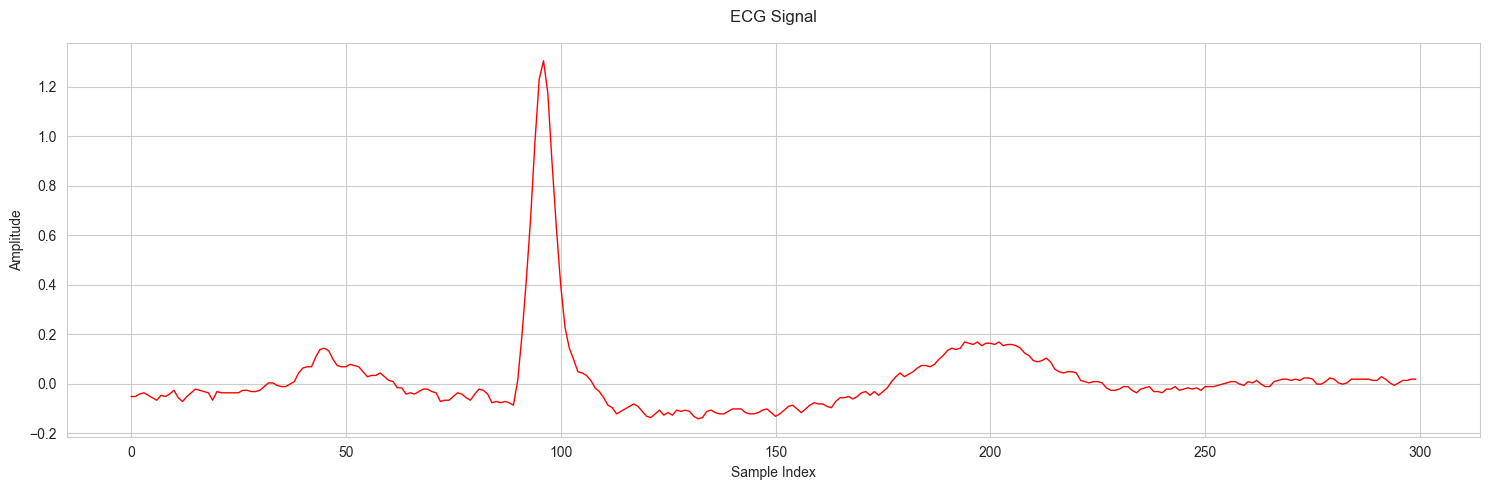

In [10]:
plot_ecg_signal(train_normal)

LBBB ECG

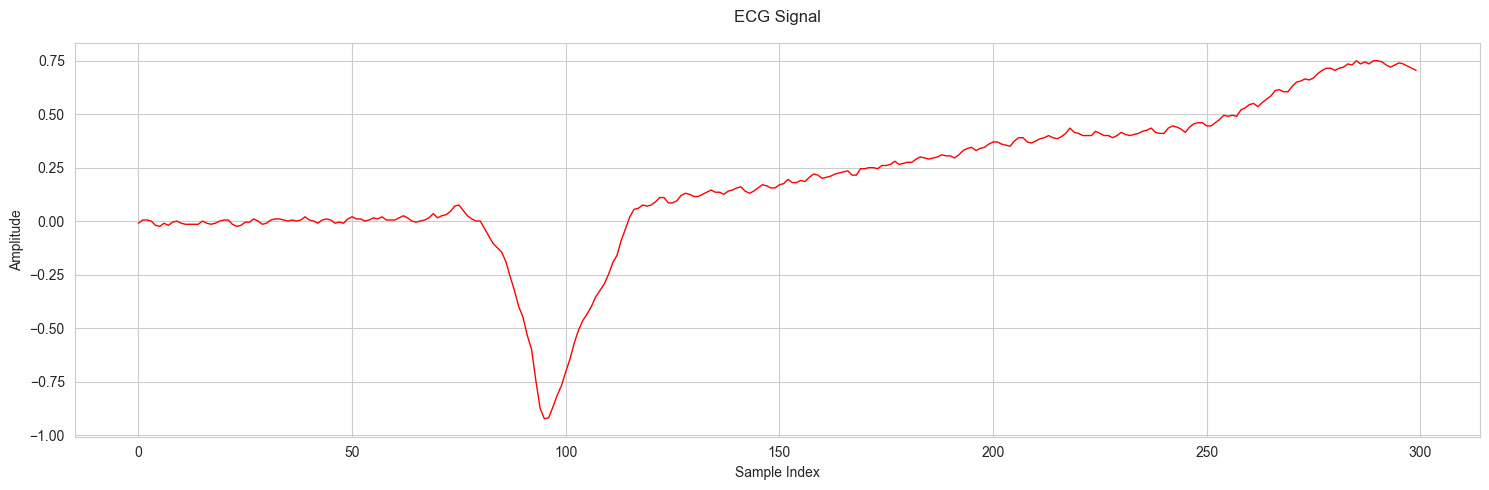

In [11]:
plot_ecg_signal(train_lbbb)

----

## Section 2: Signal Preprocessing

For our signal samples to be ready for processing and classification we need to make sure that they are generalized to one form so our models consider them as the same entity.
To do so we consider the following:
- Removing the DC-Component (mean subtraction). 
- Filtering using BandPass (Butterworth 0.5 to 40).
- Normalizing the signal (0 to 1 interval).

In [12]:
from utils import *

### Applying our preprocessing using our custom utility functions

In [13]:
processed_normal_train = preprocess_ecg_batch(train_normal,360)
processed_lbbb_train = preprocess_ecg_batch(train_lbbb, 360)
processed_normal_test = preprocess_ecg_batch(test_normal,360)
processed_lbbb_test = preprocess_ecg_batch(test_lbbb, 360)



### Visualizing our signals before and after preprocessing

Normal ECG

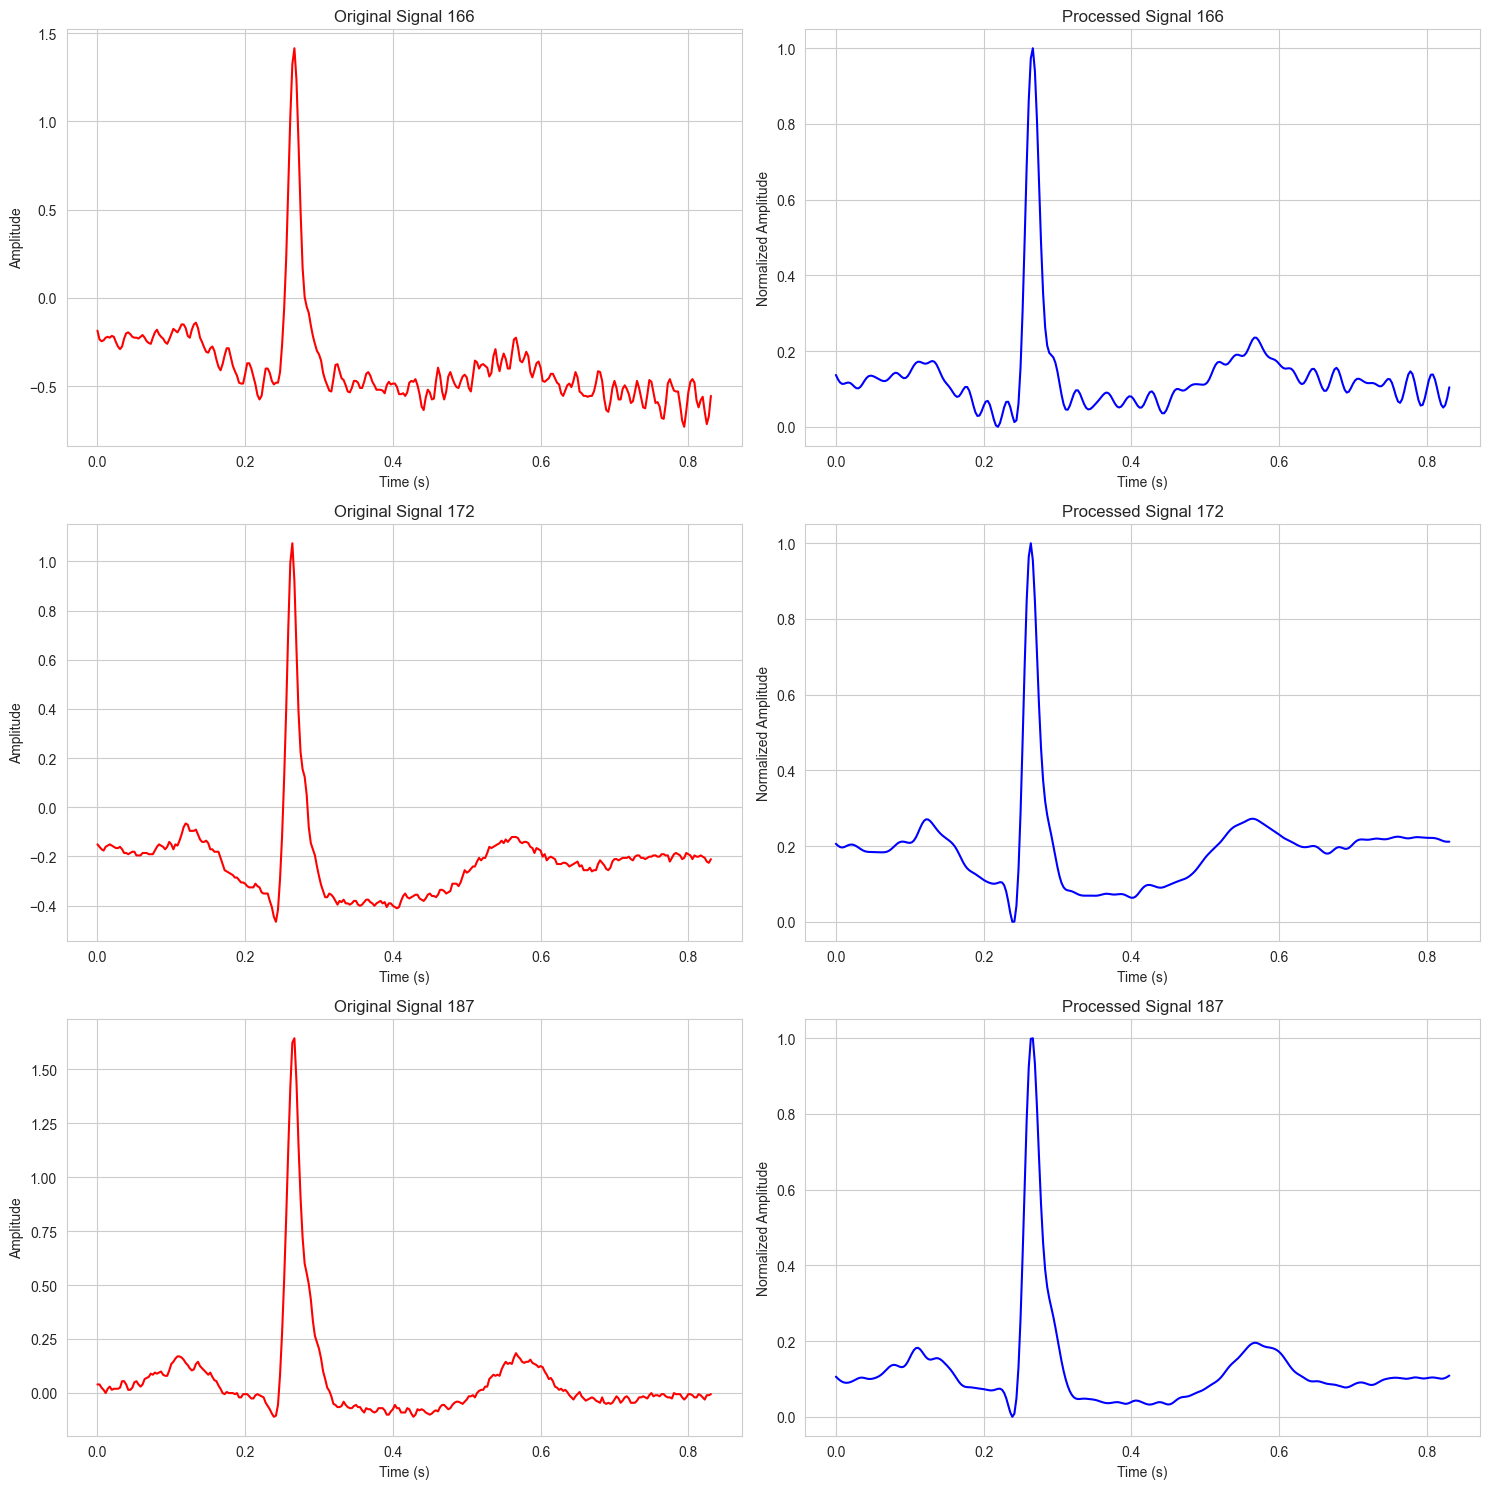

In [14]:
plot_signal_comparison(train_normal, processed_normal_train, 360)

LBBB ECG

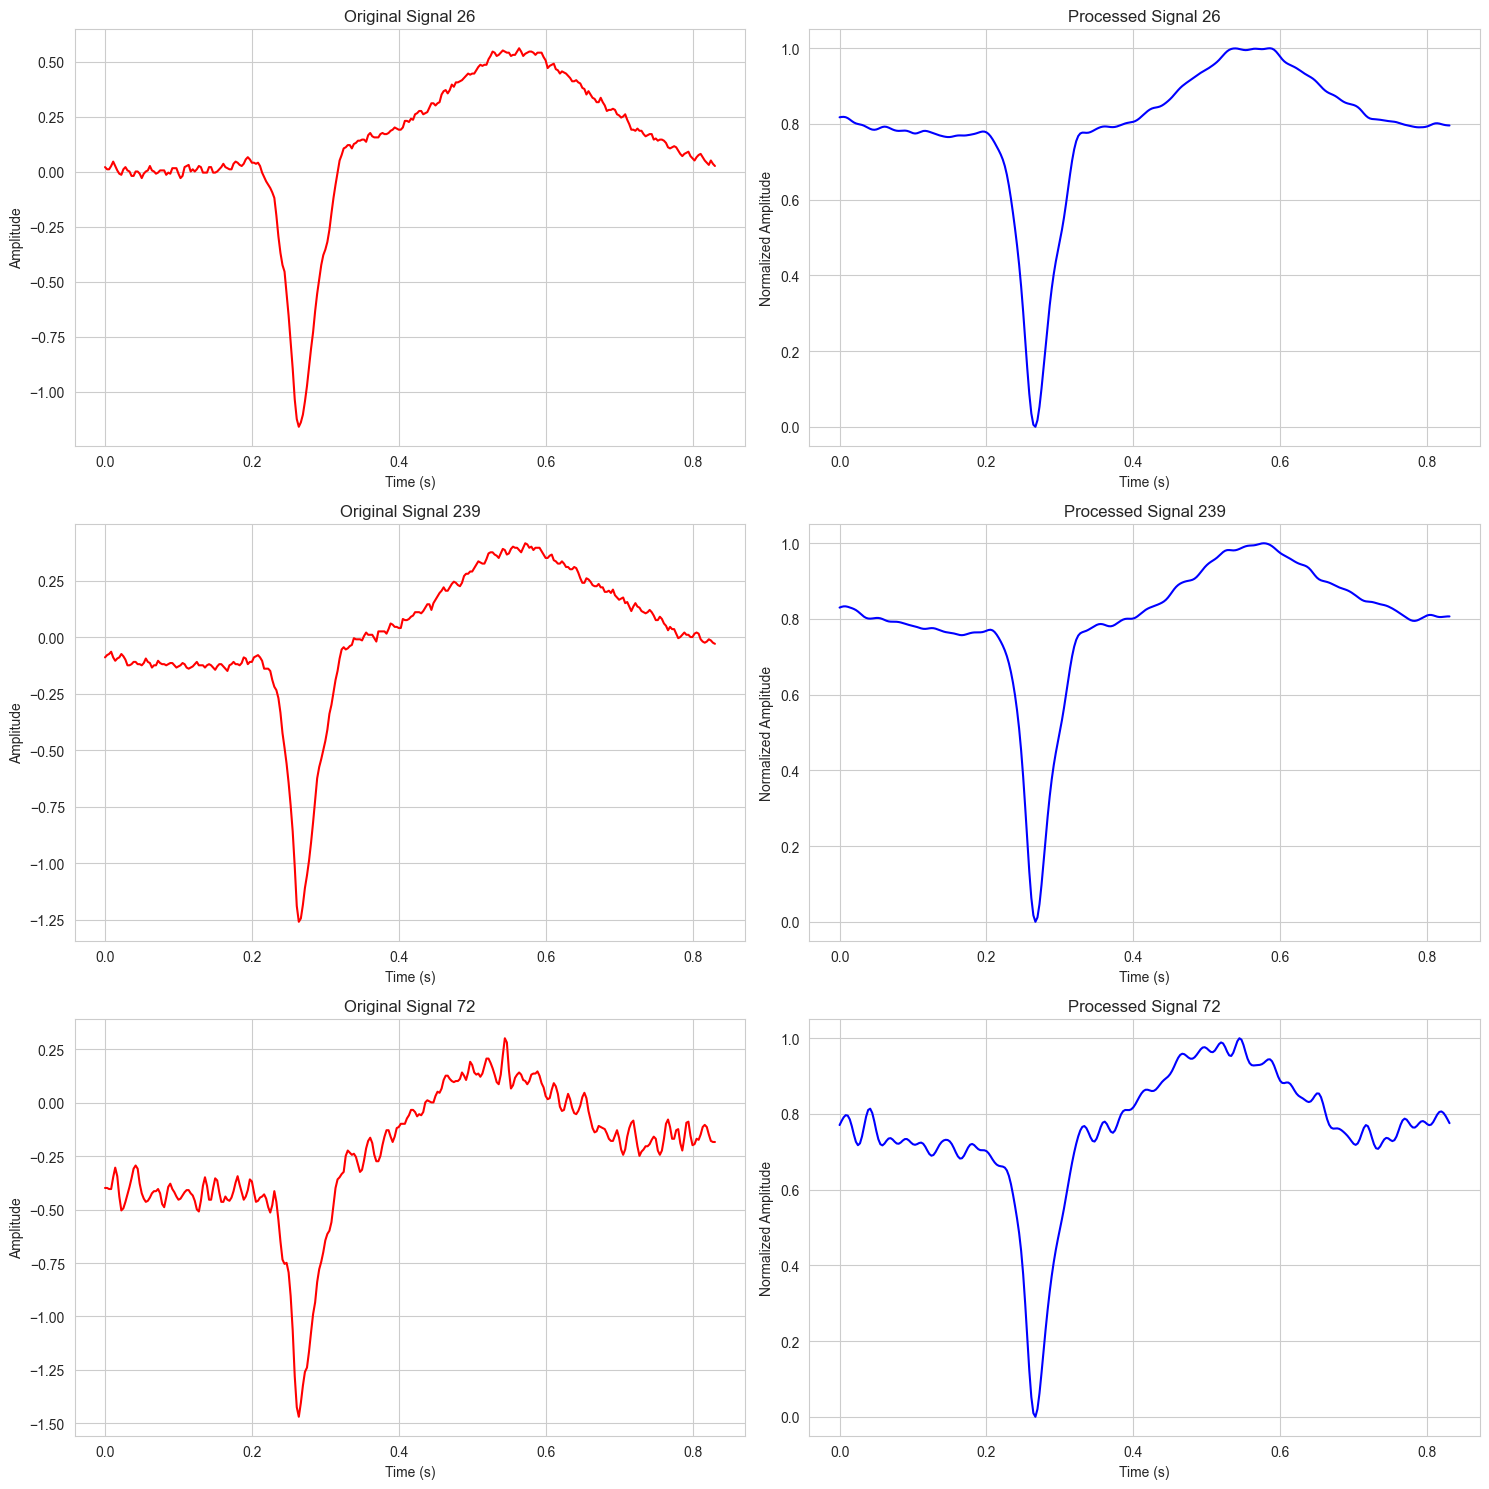

In [15]:
plot_signal_comparison(train_lbbb, processed_lbbb_train, 360)

----

## Section 3: Discrete Wavelet Transform for Feature Extraction

In [16]:
print(processed_normal_train.iloc[0].values)

[8.33100759e-02 8.50748820e-02 8.61312814e-02 8.61305556e-02
 8.52429909e-02 8.40141628e-02 8.30052465e-02 8.24649120e-02
 8.22734457e-02 8.21956424e-02 8.22255256e-02 8.27092491e-02
 8.40943873e-02 8.64768767e-02 8.93313073e-02 9.16942855e-02
 9.27052922e-02 9.21212090e-02 9.04471636e-02 8.86166254e-02
 8.74646008e-02 8.73421656e-02 8.80685954e-02 8.91679607e-02
 9.01971452e-02 9.09946701e-02 9.17670412e-02 9.29925414e-02
 9.51643560e-02 9.84601635e-02 1.02507771e-01 1.06432176e-01
 1.09243232e-01 1.10400588e-01 1.10237570e-01 1.09979258e-01
 1.11328788e-01 1.15843096e-01 1.24403173e-01 1.36971095e-01
 1.52621742e-01 1.69702435e-01 1.86020224e-01 1.99128916e-01
 2.06859892e-01 2.08049585e-01 2.03107918e-01 1.93990917e-01
 1.83448487e-01 1.73902089e-01 1.66576711e-01 1.61348072e-01
 1.57294384e-01 1.53508957e-01 1.49626938e-01 1.45786303e-01
 1.42168485e-01 1.38542184e-01 1.34182559e-01 1.28230490e-01
 1.20247095e-01 1.10615386e-01 1.00556372e-01 9.17348588e-02
 8.56139369e-02 8.282700

c:\Git\ECG-LBBB-model\utils.py:131: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


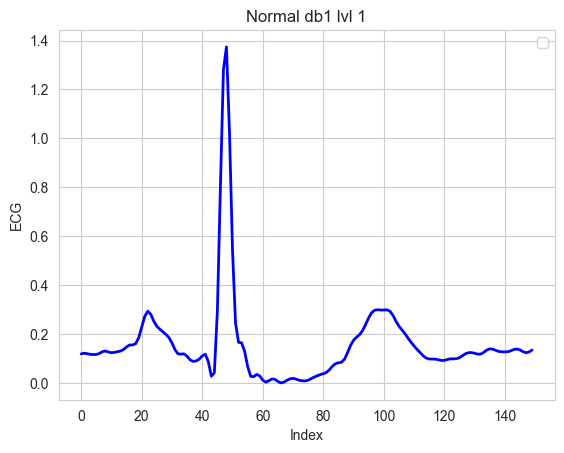

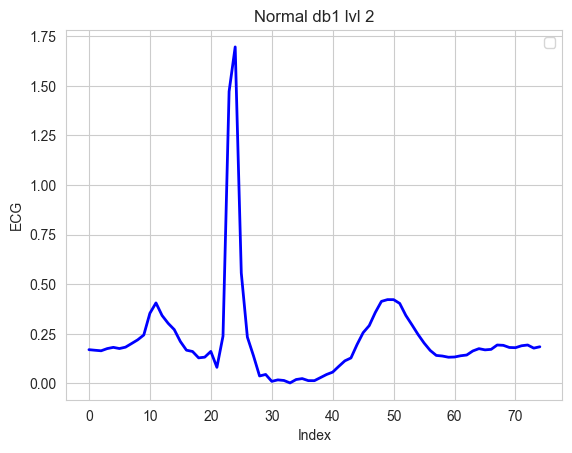

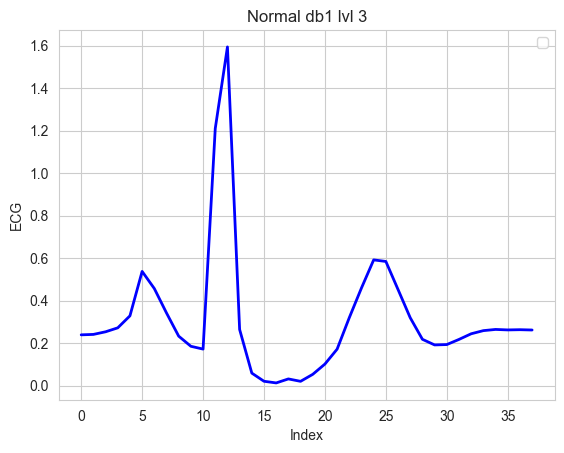

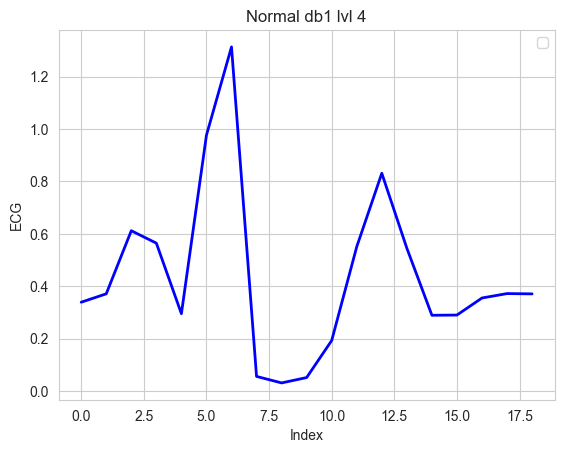

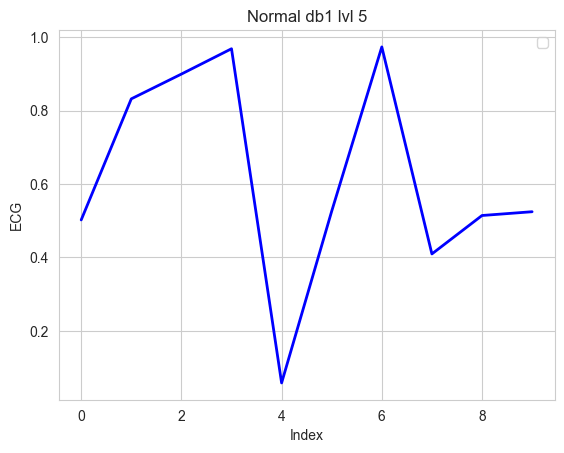

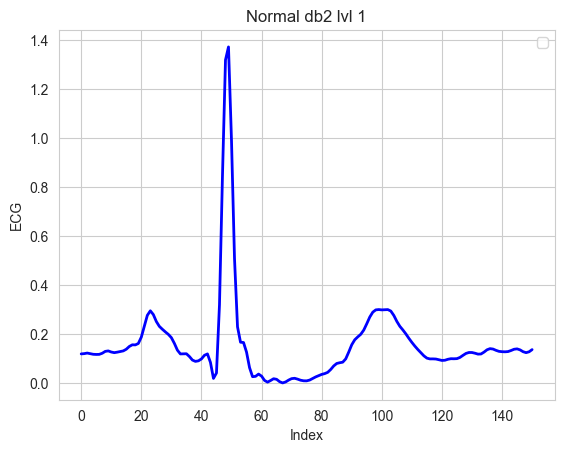

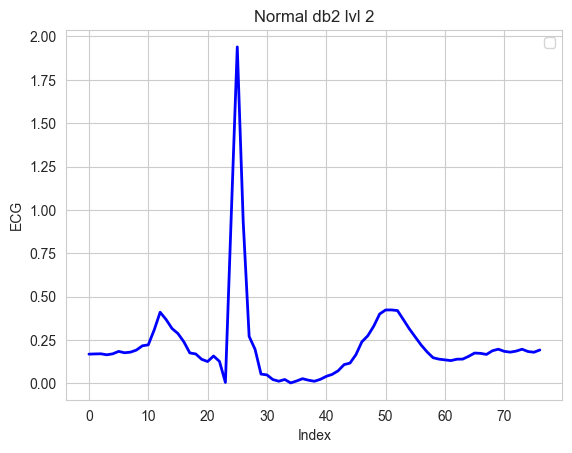

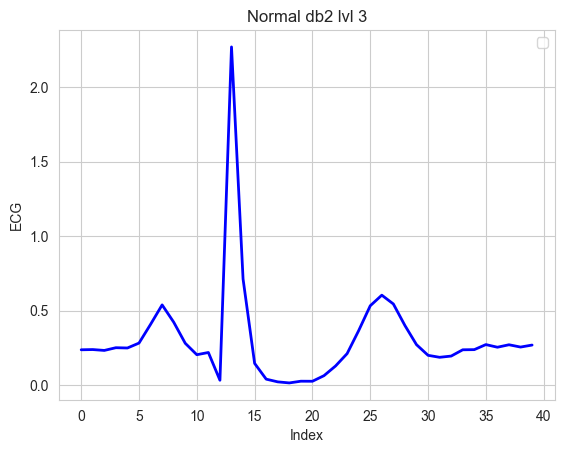

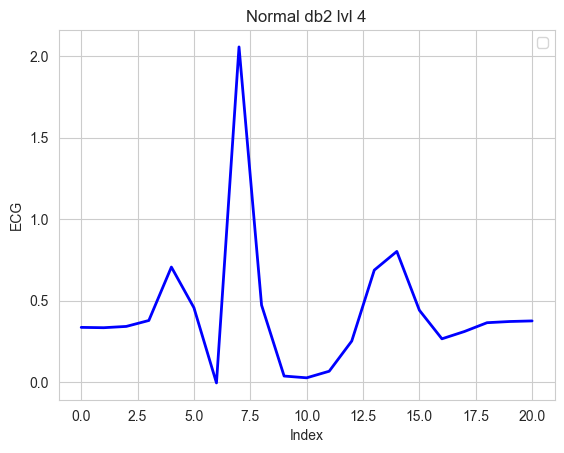

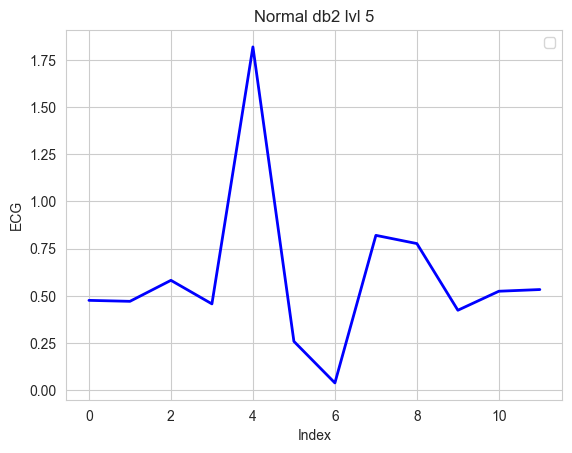

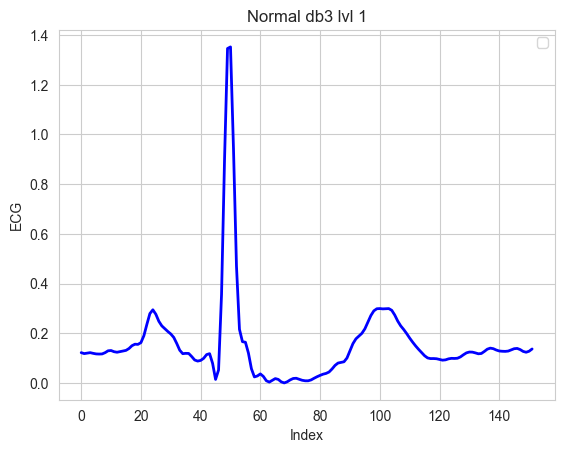

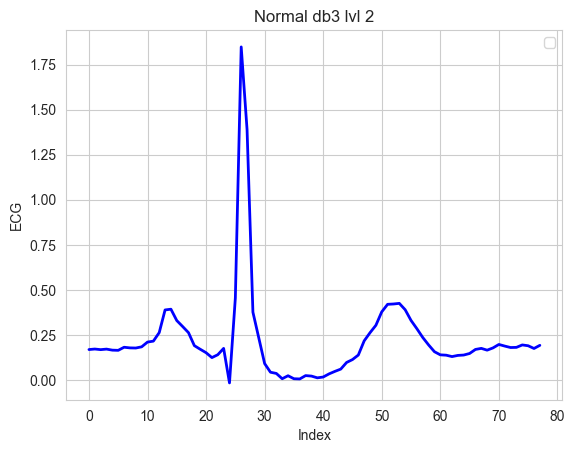

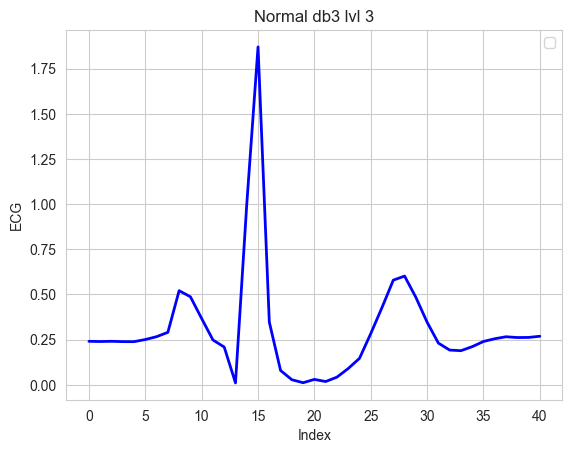

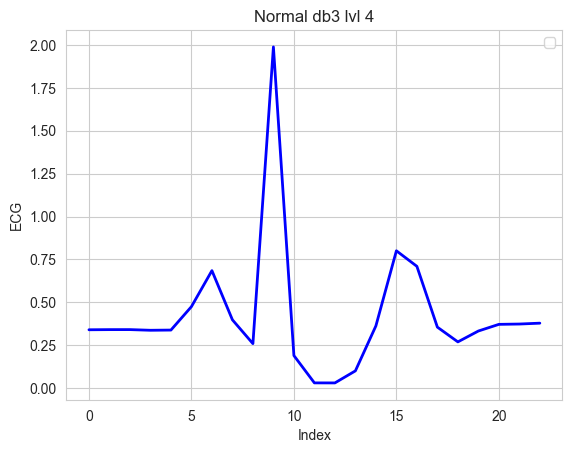

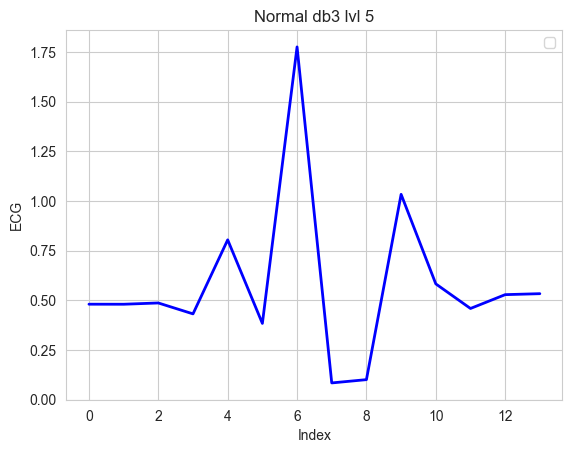

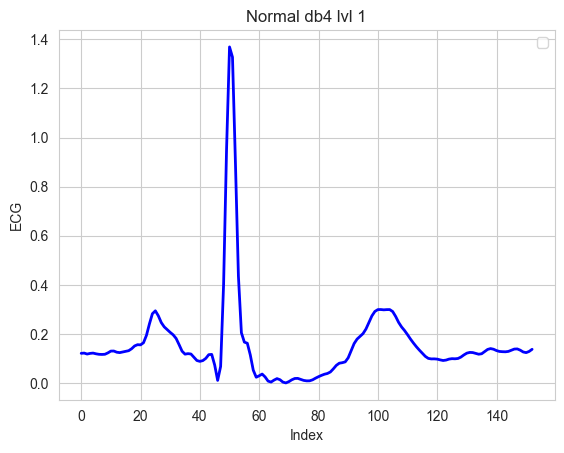

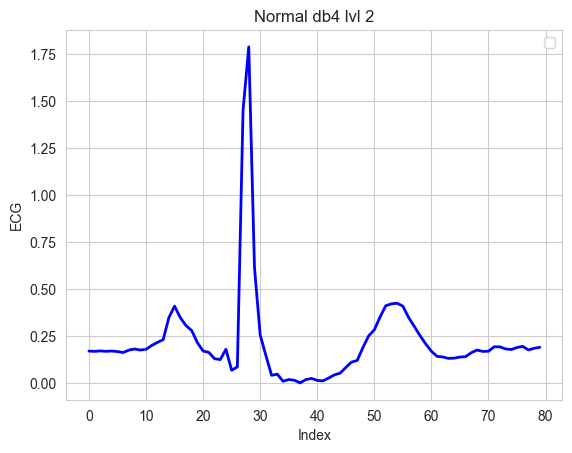

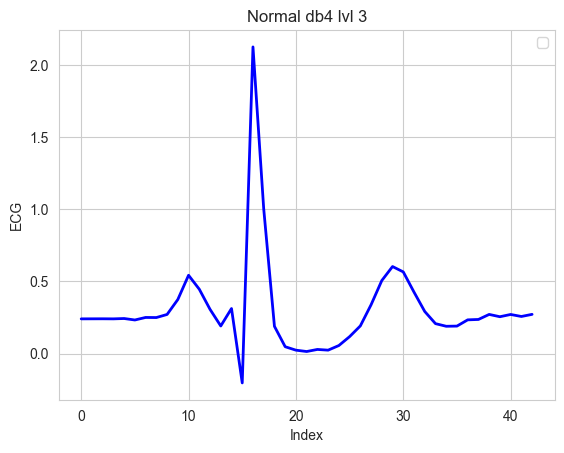

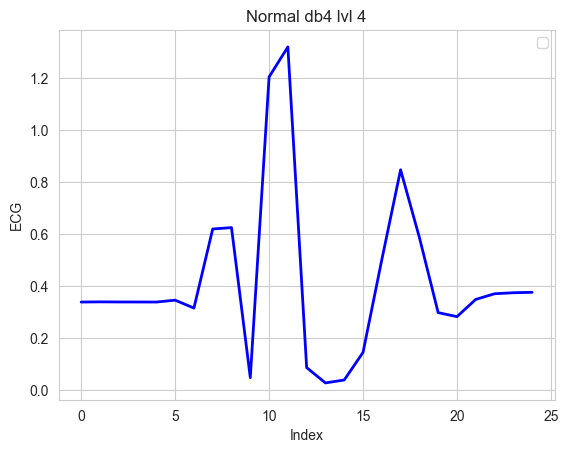

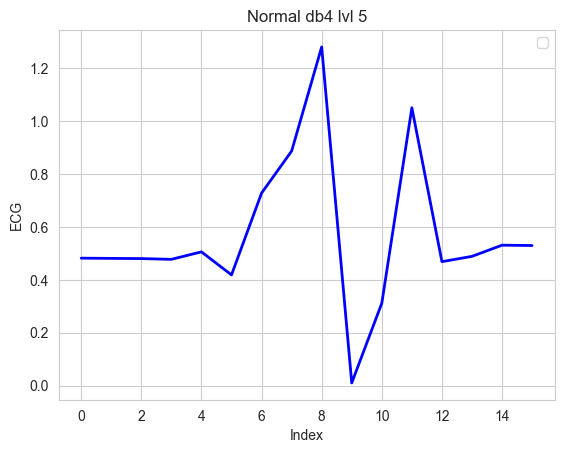

In [17]:
for i in range(4):
    for j in range(5):
        WAVELET_FAMILY = 'db' + str(i + 1)
        LEVEL = j + 1
        train_app=[]
        test_app=[]
        for signal in range(5):
            train_coeff=pywt.wavedec(processed_normal_train.iloc[signal].values,wavelet=WAVELET_FAMILY,level=LEVEL)
            train_app.append(train_coeff[0])
        
        plot(train_app[0],"Normal " + WAVELET_FAMILY + " lvl " + str(LEVEL))

In [18]:
processed_normal_train['label'] = 0
processed_lbbb_train['label'] = 1
processed_normal_test['label'] = 0
processed_lbbb_test['label'] = 1

In [19]:
def extract_wavelet_features(signals, wavelet='db3', level=2):
    """
    Extract wavelet features from ECG signals using discrete wavelet transform.

    Parameters:
    signals (numpy.ndarray): Array of signals (each row is a signal).
    wavelet (str): Wavelet type (e.g., 'db4').
    level (int): Level of decomposition.

    Returns:
    numpy.ndarray: Array of wavelet features (using only approximation coefficients).
    """
    features = []
    for signal in signals:
        coeffs = pywt.wavedec(signal, wavelet, level=level)
        # Use only approximation coefficients as features
        feature_vector = []
        feature_vector.append(np.mean(coeffs[0]))
        feature_vector.append(np.std(coeffs[0]))
        feature_vector.append(skew(coeffs[0]))
        feature_vector.append(kurtosis(coeffs[0]))
       # feature_vector.append(np.sum(coeffs[0] ** 2))  # Energy as the sum of squares
       # feature_vector.append(entropy(np.abs(coeffs[0])))  # Entropy (based on absolute values)
      #  feature_vector.append(np.max(coeffs[0]))  # Maximum value
     #   feature_vector.append(np.min(coeffs[0]))  # Minimum value
        features.append(feature_vector)  # Wrap in list to ensure 2D array
    return np.array(features)

In [20]:
# Combine datasets
train_data = pd.concat([processed_normal_train, processed_lbbb_train], axis=0).reset_index(drop=True)
test_data = pd.concat([processed_normal_test, processed_lbbb_test], axis=0).reset_index(drop=True)

In [21]:
# Shuffle the combined datasets
train_data = shuffle(train_data, random_state=42).reset_index(drop=True)
test_data = shuffle(test_data, random_state=42).reset_index(drop=True)

In [22]:
# Separate features and labels
X_train = train_data.iloc[:, :-1].values
y_train = train_data['label'].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data['label'].values

In [23]:
# Extract features
wavelet_train = extract_wavelet_features(X_train)
wavelet_test = extract_wavelet_features(X_test)

In [24]:
print(wavelet_train)

[[ 0.37737508  0.27177959  3.28335463 14.76262411]
 [ 1.57117068  0.35189644 -2.40874425  7.00910082]
 [ 1.61349693  0.37797147 -2.43178909  6.15784463]
 ...
 [ 1.42584731  0.35946245 -1.31932658  3.37194474]
 [ 1.57919849  0.34401199 -2.41774553  7.42655658]
 [ 0.28416364  0.26129211  3.95481478 20.46031652]]


----

## Section 4: Modelling

In [25]:
# Define models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "SVM": SVC(C=0.1,kernel='linear',gamma='auto', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [26]:
# Train and evaluate models
for model_name, model in models.items():
    print(f"\nEvaluating model: {model_name}")
    model.fit(wavelet_train, y_train)
    y_pred = model.predict(wavelet_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    #print("Confusion Matrix:")
    #print(confusion_matrix(y_test, y_pred))
    #print("\nClassification Report:")
    #print(classification_report(y_test, y_pred))


Evaluating model: KNN
Accuracy: 91.08%

Evaluating model: SVM
Accuracy: 39.90%

Evaluating model: Random Forest
Accuracy: 34.85%


### Grid Search

In [27]:
param_grids = {
    "KNN": {
        "n_neighbors": [7, 9],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2]
    },
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "solver": ["liblinear", "saga"],
        "max_iter": [100, 200]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    },
    "AdaBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 1]
    },
    "Decision Tree": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }
}

In [28]:
# Create models
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(random_state=45),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=45)
}

In [29]:
# Grid search for each model
for model_name, model in models.items():
    print(f"\nEvaluating model: {model_name}")
    
    # Set up GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    
    # Fit the model with grid search
    grid_search.fit(wavelet_train, y_train)
    
    # Best parameters and accuracy
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_ * 100
   # if model_name == "SVM" :
    #   print(f"Best parameters: {best_params}")
     #  print(f"Best cross-validation accuracy: {best_accuracy:.2f}%")
    
    # Evaluate on the test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(wavelet_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test accuracy: {accuracy * 100:.2f}%")


Evaluating model: KNN
Test accuracy: 50.67%

Evaluating model: SVM
Test accuracy: 39.90%

Evaluating model: Random Forest
Test accuracy: 34.68%

Evaluating model: Logistic Regression
Test accuracy: 35.86%

Evaluating model: Gradient Boosting
Test accuracy: 34.85%

Evaluating model: AdaBoost
Test accuracy: 34.85%

Evaluating model: Decision Tree
Test accuracy: 34.85%


----

## Conclusion